In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [5]:
os.system("sh check_dup.sh 3 1 10")
dDup = pd.read_table("size_dup.txt", delimiter=" ", index_col=False)

In [8]:
dDup

,Len,Dup
0,3,0
1,4,1
2,5,0
3,6,0
4,7,0
5,8,1
6,9,2
7,10,3


<AxesSubplot:xlabel='Len'>

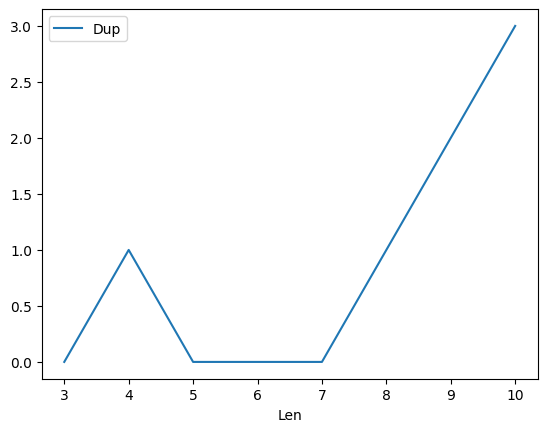

In [7]:
dDup.plot(x='Len', y='Dup')